In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
DATA_PATH = '../data/BipolarDerivedDataTraining.csv'
NTHREADS = 32

In [4]:
bp_df = pd.read_csv(DATA_PATH)

In [5]:
bp_df.head()

,record_id,group,age,gender,handedness,ses_ladder_rung,history_smoking,frequency_currentsmoking,age_at_first_mood_syndrome,madrs_score,...,31p_cc_ant_gatp,31p_cc_ant_gatpr,31p_cc_ant_aatp,31p_cc_ant_aatpr,31p_l_pat_ph,31p_l_pat_pcr,31p_l_pat_gatp,31p_l_pat_gatpr,31p_l_pat_aatp,31p_l_pat_aatpr
0,1035,Case,29,Female,Right,2,Past Smoker,Not at all,14.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1637,Case,52,Female,Right,3,NaN,NaN,6.0,23,...,5918480.0,0.630314,8678260.0,0.790509,7.24003,10736800.0,3556370.0,0.490448,3544560.0,0.448918
2,1462,Case,51,Female,Right,4,Never Smoker,Not at all,33.0,28,...,8242230.0,0.921422,3362510.0,0.445127,7.16535,11783200.0,6115790.0,0.580259,4545140.0,0.530136
3,1264,Case,57,Female,Right,4,Never Smoker,Not at all,16.0,13,...,9900240.0,0.720967,3497420.0,0.562180,7.23599,8189780.0,5744920.0,0.705318,3075420.0,0.444548
4,1263,Case,41,Female,Right,9,Current Smoker,Some days,11.0,28,...,13869000.0,0.529107,6048170.0,0.260253,7.30881,16719200.0,11416500.0,0.638139,3904680.0,0.247752


In [14]:
# select the t1r columns
t1r_df = bp_df.filter(regex=("t1r_r"))
display(t1r_df.shape)
t1r_df.head()

(88, 40)

,t1r_r_latvent_m,t1r_r_latvent_nv,t1r_r_inflatvent_m,t1r_r_inflatvent_nv,t1r_r_cbmwm_m,t1r_r_cbmwm_nv,t1r_r_cbmctx_m,t1r_r_cbmctx_nv,t1r_r_thalproper_m,t1r_r_thalproper_nv,...,t1r_rsuptmp_m,t1r_rsuptmp_nv,t1r_rsupmarg_m,t1r_rsupmarg_nv,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130.7910,273.0,500.789000,27.0,107.145000,15125.0,118.80500,61573.0,85.2864,8259.0,...,110.7230,10621.0,102.1060,14119.0,109.553,4521.0,59.8377,927.0,84.45810,1736.0
2,137.0540,235.0,201.454000,22.0,93.273600,12859.0,93.00200,63222.0,85.9429,8440.0,...,116.8850,11555.0,101.4770,14246.0,105.163,4718.0,43.6359,1612.0,77.38230,2110.0
3,-27.4735,233.0,-0.023968,33.0,0.001425,11211.0,9.62701,53143.0,25.0797,7300.0,...,26.8279,11531.0,68.7236,17829.0,109.258,5400.0,0.0000,1242.0,-3.94339,1871.0
4,133.9490,212.0,146.141000,31.0,99.184300,10580.0,111.70800,54866.0,90.9556,8407.0,...,99.2622,10421.0,109.6990,13597.0,97.500,4582.0,72.0180,1111.0,82.15930,1893.0


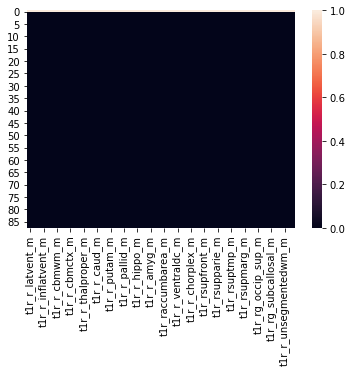

In [16]:
# looks like only the first record has missing data
sns.heatmap(t1r_df.isna())

In [42]:
# Are there any nans beyond the first row?
t1r_df.loc[1:,:].isna().values.any()

False

In [20]:
# since the first row is all nans, we will drop that row
t1r_df.drop(0, axis=0, inplace=True)
t1r_df.head()

/home/jdkent/.local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,t1r_r_latvent_m,t1r_r_latvent_nv,t1r_r_inflatvent_m,t1r_r_inflatvent_nv,t1r_r_cbmwm_m,t1r_r_cbmwm_nv,t1r_r_cbmctx_m,t1r_r_cbmctx_nv,t1r_r_thalproper_m,t1r_r_thalproper_nv,...,t1r_rsuptmp_m,t1r_rsuptmp_nv,t1r_rsupmarg_m,t1r_rsupmarg_nv,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv
1,130.7910,273.0,500.789000,27.0,107.145000,15125.0,118.80500,61573.0,85.2864,8259.0,...,110.7230,10621.0,102.1060,14119.0,109.553,4521.0,59.8377,927.0,84.45810,1736.0
2,137.0540,235.0,201.454000,22.0,93.273600,12859.0,93.00200,63222.0,85.9429,8440.0,...,116.8850,11555.0,101.4770,14246.0,105.163,4718.0,43.6359,1612.0,77.38230,2110.0
3,-27.4735,233.0,-0.023968,33.0,0.001425,11211.0,9.62701,53143.0,25.0797,7300.0,...,26.8279,11531.0,68.7236,17829.0,109.258,5400.0,0.0000,1242.0,-3.94339,1871.0
4,133.9490,212.0,146.141000,31.0,99.184300,10580.0,111.70800,54866.0,90.9556,8407.0,...,99.2622,10421.0,109.6990,13597.0,97.500,4582.0,72.0180,1111.0,82.15930,1893.0
5,225.5410,254.0,304.291000,53.0,91.036400,12799.0,115.71100,59927.0,110.2270,8211.0,...,138.7250,9577.0,151.3350,14310.0,126.765,4401.0,12.8967,1157.0,89.07550,1860.0


In [21]:
# define the group classification
group = bp_df.loc[1:,'group']

In [22]:
# split the data into test/training sets (test size will have 10 participants)
X_train, X_test, y_train, y_test = train_test_split(t1r_df, group, test_size=10, stratify=group)

In [23]:
y_test

25       Case
57    Control
34       Case
13       Case
73    Control
39       Case
87    Control
27       Case
22       Case
77    Control
Name: group, dtype: object

In [24]:
# look at the training dataset
X_train.head()

,t1r_r_latvent_m,t1r_r_latvent_nv,t1r_r_inflatvent_m,t1r_r_inflatvent_nv,t1r_r_cbmwm_m,t1r_r_cbmwm_nv,t1r_r_cbmctx_m,t1r_r_cbmctx_nv,t1r_r_thalproper_m,t1r_r_thalproper_nv,...,t1r_rsuptmp_m,t1r_rsuptmp_nv,t1r_rsupmarg_m,t1r_rsupmarg_nv,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv
70,151.926,175.0,197.203,27.0,89.5239,13739.0,96.9416,72897.0,85.6525,9601.0,...,102.261,13703.0,104.566,18302.0,99.1019,4503.0,52.8149,1307.0,78.4956,2201.0
51,111.968,187.0,128.679,15.0,84.6383,9771.0,95.4535,48981.0,80.2497,8690.0,...,111.588,10978.0,119.291,15723.0,154.0440,5787.0,21.9844,1174.0,77.4893,1696.0
5,225.541,254.0,304.291,53.0,91.0364,12799.0,115.7110,59927.0,110.2270,8211.0,...,138.725,9577.0,151.335,14310.0,126.7650,4401.0,12.8967,1157.0,89.0755,1860.0
1,130.791,273.0,500.789,27.0,107.1450,15125.0,118.8050,61573.0,85.2864,8259.0,...,110.723,10621.0,102.106,14119.0,109.5530,4521.0,59.8377,927.0,84.4581,1736.0
21,126.291,303.0,183.133,40.0,99.3021,11524.0,104.5820,50921.0,81.4174,9282.0,...,108.240,11633.0,120.556,15078.0,110.5880,3771.0,52.4342,1603.0,73.3718,2091.0


In [25]:
# look at the testing data
X_test.head()

,t1r_r_latvent_m,t1r_r_latvent_nv,t1r_r_inflatvent_m,t1r_r_inflatvent_nv,t1r_r_cbmwm_m,t1r_r_cbmwm_nv,t1r_r_cbmctx_m,t1r_r_cbmctx_nv,t1r_r_thalproper_m,t1r_r_thalproper_nv,...,t1r_rsuptmp_m,t1r_rsuptmp_nv,t1r_rsupmarg_m,t1r_rsupmarg_nv,t1r_rg_occip_sup_m,t1r_rg_occip_sup_nv,t1r_rg_subcallosal_m,t1r_rg_subcallosal_nv,t1r_r_unsegmentedwm_m,t1r_r_unsegmentedwm_nv
25,150.405,247.0,187.692,27.0,93.9562,11162.0,103.1430,54890.0,91.2244,7289.0,...,118.2890,9376.0,115.6480,13738.0,96.9648,3911.0,45.6264,1057.0,86.6040,1641.0
57,145.953,109.0,150.318,19.0,89.3371,12930.0,109.4540,61017.0,85.2122,7537.0,...,100.8750,11856.0,111.1220,15009.0,115.9080,4512.0,59.4922,1003.0,87.8325,1865.0
34,127.748,203.0,237.708,24.0,128.7110,14355.0,94.1463,62842.0,83.9860,9138.0,...,99.5726,11792.0,97.2467,14537.0,90.9658,3975.0,85.4736,1408.0,81.7608,2295.0
13,137.932,231.0,161.018,29.0,105.8370,11861.0,119.5190,50841.0,84.7876,7384.0,...,94.3091,10697.0,95.4933,13827.0,89.7204,2725.0,62.1712,1089.0,79.2191,1710.0
73,125.434,260.0,172.727,40.0,89.4036,12548.0,103.2950,56688.0,87.7024,7807.0,...,96.6670,13121.0,101.2940,15818.0,86.0399,3716.0,107.1410,1411.0,85.1867,1729.0


In [26]:
# see how many are Case/Controls in the training dataset
y_train.describe()

count       77
unique       2
top       Case
freq        50
Name: group, dtype: object

In [27]:
# see how many are Case/Controls are in the testing dataset
y_test.describe()

count       10
unique       2
top       Case
freq         6
Name: group, dtype: object

In [30]:
# test pca
pca_test = PCA(n_components=0.99)


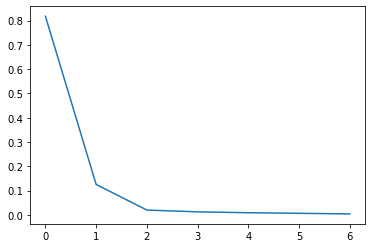

In [31]:
# the first component explains a lot of the variance, but up to 4 could be included
pca_test.fit_transform(X_train)
plt.plot(pca_test.explained_variance_ratio_)

In [36]:
pca_test.components_

array([[-7.55926068e-04, -1.87116738e-03, -2.34886232e-04,
         4.36430084e-07,  1.29910442e-03, -1.83792948e-01,
        -2.06310747e-04, -9.09189493e-01,  4.90625062e-04,
        -2.33409004e-02,  1.65407832e-04, -2.54068920e-02,
         4.41410174e-04, -3.47419039e-02,  1.48354797e-03,
        -1.22922773e-02,  1.41939288e-04, -2.87202550e-02,
         8.51359977e-05, -9.12808557e-03,  2.08804340e-05,
        -4.02444276e-03,  6.60475913e-04, -1.34271224e-02,
        -1.56644513e-04, -4.14176826e-04,  4.66093691e-04,
        -2.63696015e-01, -4.14313502e-04, -9.67808126e-02,
         7.54925005e-05, -1.43260444e-01, -7.18757351e-05,
        -1.84573290e-01, -4.27641174e-04, -4.47364143e-02,
         1.25100816e-03, -1.56575407e-02,  3.09970693e-04,
        -1.38076667e-02],
       [-6.13319516e-04, -5.93480661e-04, -3.03115554e-03,
         3.59340884e-04,  1.02919706e-03, -4.25935280e-02,
        -1.67673693e-04, -3.27847866e-01,  1.06145518e-03,
         1.68681673e-01,  6.06

In [37]:
# lets try logistic regression on the raw data
logr_test = LogisticRegression(max_iter=1000, n_jobs=NTHREADS)


In [38]:
logr_test.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=32, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
logr_test.score(X_test, y_test)

0.4

In [20]:
# test to see how different parameters change the fit of the model


In [40]:
# setup a pipeline to run PCA, then run Logistic Regression

# setup PCA
pca = PCA()
# define the options I would like to vary within PCA
n_components_opts = [2, 4, 8]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000)
# define options I would like to vary with logistic regression
penalty_opts = ['l1', 'l2']
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params = [
    {
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
        'clf__penalty': penalty_opts,
        'clf__C': C_opts,
    }
]


pipeline = Pipeline([("pca", pca), ("clf", clf)])

In [22]:
# search the parameter defined above to find the "best" model
search = GridSearchCV(pipeline, n_jobs=NTHREADS, param_grid=grid_params, cv=10, scoring='roc_auc')

In [23]:
# fit on the training data
search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                        

In [24]:
# see the parameters for the best model
search.best_params_

{'clf__C': 1.0,
 'clf__penalty': 'l2',
 'pca__n_components': 8,
 'pca__whiten': True}

In [25]:
# get the score for the held out test data
search.score(X_test, y_test)

0.9166666666666667

In [26]:
# see how well the algorithm guessed on the held out testing data
search.predict(X_test) == y_test.values

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True])